# AMAT503:  Lecture 12

February 15, 2018.

Michael Lamoureux

# HEADS' UP!

I will be using [Jupyter notebooks](https://jupyter.org) in this classroom, to combine text, math, and graphics. 

Students can access Jupyter at [ucalgary.syzygy.ca](https://ucalgary.syzygy.ca)

An eBook on how to use syzygy is here: [intro.syzygy.ca](http://intro.syzygy.ca)

Lecture notes, code, assignments, etc are available on a git repo: [github.com/mlamoureux](https://github.com/mlamoureux)

The textbnook for the course is available electronically
[here](https://ucalgary.summon.serialssolutions.com/#!/#!%2Fsearch%3FbookMark=ePnHCXMwhZ3bCoJAEIYNvCjrGcq6CLoQFMLoNjN6gO4H6QBSWLRrh7fvH2ddC4QuxQ_Fw87-M7v7r-e4yFuPHXFTYoMxiNIYSbV43SxC_EMRdyEeV8mQFIlTMnQJOl9ogW5dIGGvc2RuPcdf52hBkJD-M-PNGLSvvzQdvs3AcfW9RDQdbdJdsg2MheubTAWEeBZXHLHXXiBEs6iByiIveOdjKvcR8YIWZChLhHZ2au87M-EzdUbIQTjSih6XahhT0c_zgR0Lq7ITslyyTPPMYKbC1FGfqkuZaZiUrhLId-gLgEMBZfCYbuI8QVFYjZPy9pmTVkC_dCvULKiyqL2VgbiIcrja03KI5h3PGfr3aj8nd5KS)

or [here](https://proquest-safaribooksonline-com.ezproxy.lib.ucalgary.ca/9780470183113?uicode=ucalgary).
Thanks to Phil for pointing this out. 


One of the links should take any student to the ucalgary login page and then to the web version of the book after they successfully login.

In [19]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from pywt import *
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display

## Summary - code versions

- We will look at a couple of applications of wavelets
- Noise reduction
- In both 1D and 2D 
- Data compression




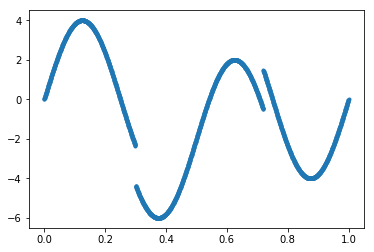

In [8]:
## Sample signal form section 9.1 in text
N=2048
t=linspace(0,1,N)
v = 4*sin(4*pi*t)-sign(t-0.3)-sign(.72-t)
plot(t,v,'.')

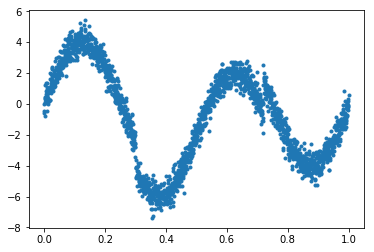

In [18]:
## Add some noise. The value 0.5 is the std deviation of Gaussian noise
ee = 0.5*randn(N)
y = v + ee
plot(t,y,'.')

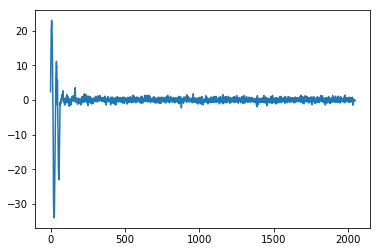

In [29]:
coeffs = wavedecn(y, wavelet='db1', level=5)
arr, coeff_slices = coeffs_to_array(coeffs)
plot(arr)

In [36]:
## Let's see how we can threshold
a = array([1, 2, 3, 4, 4, 3, 2, 1])
for k in range(a.size):
    if abs(a[k]) < 3:
        a[k] = 0
        
a

array([0, 0, 3, 4, 4, 3, 0, 0])

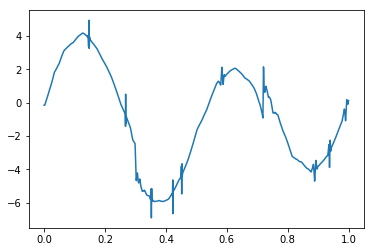

In [47]:
## Let's try hard thresholding on our wavelet coeffs
coeffs = wavedecn(y, wavelet='db3', level=8)
arr, coeff_slices = coeffs_to_array(coeffs)

thres = 1.5  # our threshold paramenter
for k in range(arr.size):
    if abs(arr[k]) < thres:
        arr[k] = 0

coeffs_from_arr = array_to_coeffs(arr, coeff_slices)

y_fixed = waverecn(coeffs_from_arr, wavelet='db3')

plot(t,y_fixed)

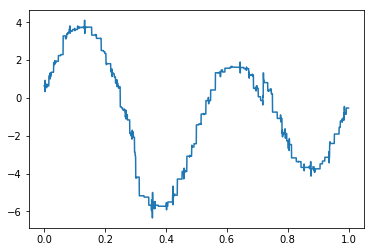

In [89]:
## Let's try soft thresholding on our wavelet coeffs
coeffs = wavedecn(y, wavelet='db1', level=8)
arr, coeff_slices = coeffs_to_array(coeffs)

thres = 1.0  # our threshold paramenter
for k in range(arr.size):
    if abs(arr[k]) < thres:
        arr[k] = 0
    elif arr[k] >= thres:
        arr[k] = arr[k] - thres
    elif arr[k] <= -thres:
        arr[k] = arr[k] + thres
        

coeffs_from_arr = array_to_coeffs(arr, coeff_slices)

y_fixed = waverecn(coeffs_from_arr, wavelet='db1')

plot(t,y_fixed)

In [60]:
## Define the MAD function for an array, as in the book (eqn 9.10)
def MAD(a):
    amed = median(a)
    return median(abs(a-amed))

In [61]:
MAD(array([1,2,3,4,5,6]))

1.5

In [74]:
## Acording to equation 9.10, this is an estimate for sigma of noise
MAD(coeffs[-1]['d'])/0.6745

0.5068532045700328

pretty damn good! (True value is 0.50)

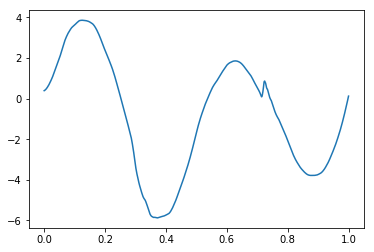

In [92]:
## We now automate the noise reduction using the universal threshold, and an estimate for sigma

## We can try different wavelets, db1, db2, db3 etc
coeffs = wavedecn(y, wavelet='db4', level=8)
arr, coeff_slices = coeffs_to_array(coeffs)

sigma_est = MAD(coeffs[-1]['d'])/0.6745

thres = sigma_est*sqrt(2*log(N))  # our universal threshold paramenter
for k in range(arr.size):
    if abs(arr[k]) < thres:
        arr[k] = 0
    elif arr[k] >= thres:
        arr[k] = arr[k] - thres
    elif arr[k] <= -thres:
        arr[k] = arr[k] + thres
        

coeffs_from_arr = array_to_coeffs(arr, coeff_slices)

y_fixed = waverecn(coeffs_from_arr, wavelet='db4')

plot(t,y_fixed)


In [84]:
thres

1.8462744837967786

In [85]:
sigma_est

0.47279426149259468

In [10]:
range(1,20)

range(1, 20)

## Can we do the same with images??


In [93]:
# This is an integer array, of a photo of a man with a camera
cam = data.camera()

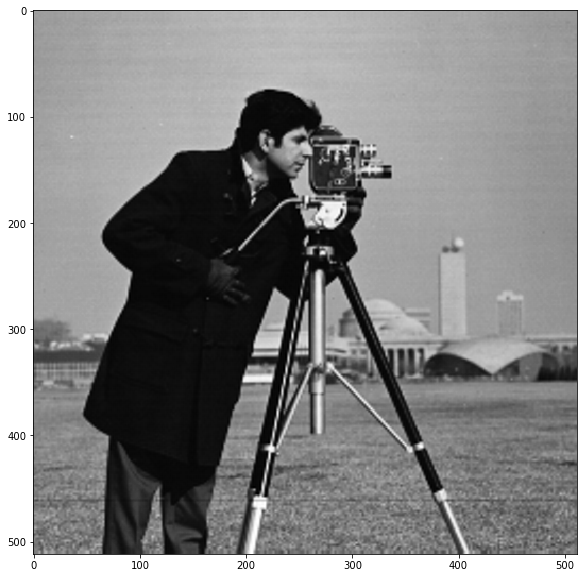

In [94]:
# We can display in grayscale, with a big 10x10 display
figure(figsize=(10, 10))
# figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
imshow(cam,cmap='gray')


In [95]:
# Do the wavelet decon
coeffs = wavedecn(cam, wavelet='db1', level=3)

In [98]:
std(cam)

61.996043576099197

In [99]:
cam.size

262144

In [100]:
cam.shape

(512, 512)

In [107]:
ee = 10*randn(512,512)

In [109]:
ee.shape

(512, 512)

In [110]:
cam_noisy = cam + ee

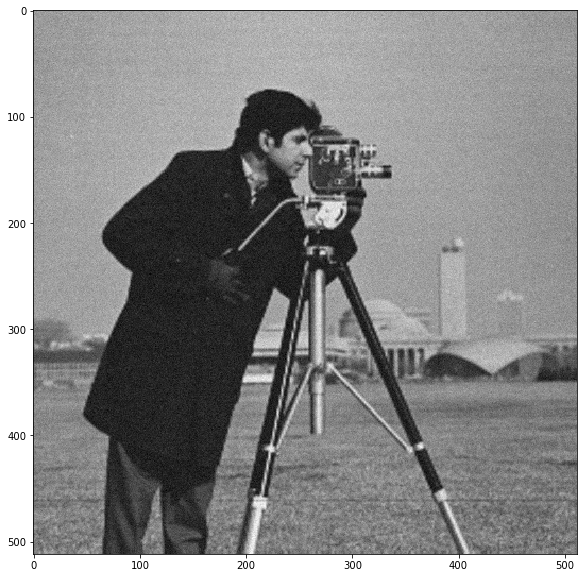

In [112]:
figure(figsize=(10, 10))
imshow(cam_noisy,cmap='gray')

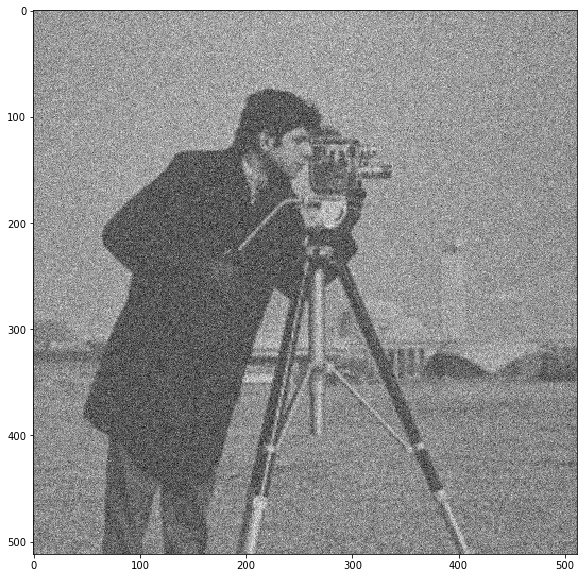

In [114]:
ee = 50*randn(512,512)
cam_noisy = cam + ee
figure(figsize=(10, 10))
imshow(cam_noisy,cmap='gray')

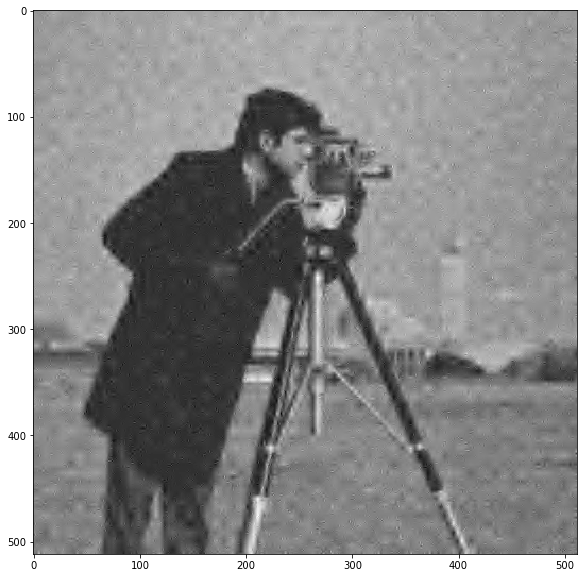

In [125]:
## Let's try soft thresholding on our wavelet coeffs
coeffs = wavedecn(cam_noisy, wavelet='db3', level=3)
arr, coeff_slices = coeffs_to_array(coeffs)

arr1 = reshape(arr,arr.shape[0]*arr.shape[1])

thres = 100.0  # our threshold paramenter
for k in range(arr1.size):
    if abs(arr1[k]) < thres:
        arr1[k] = 0
    elif arr1[k] >= thres:
        arr1[k] = arr1[k] - thres
    elif arr1[k] <= -thres:
        arr1[k] = arr1[k] + thres
        
arr  = reshape(arr1,arr.shape)
coeffs_from_arr = array_to_coeffs(arr, coeff_slices)

cam_fixed = waverecn(coeffs_from_arr, wavelet='db3')

figure(figsize=(10, 10))
imshow(cam_fixed,cmap='gray')

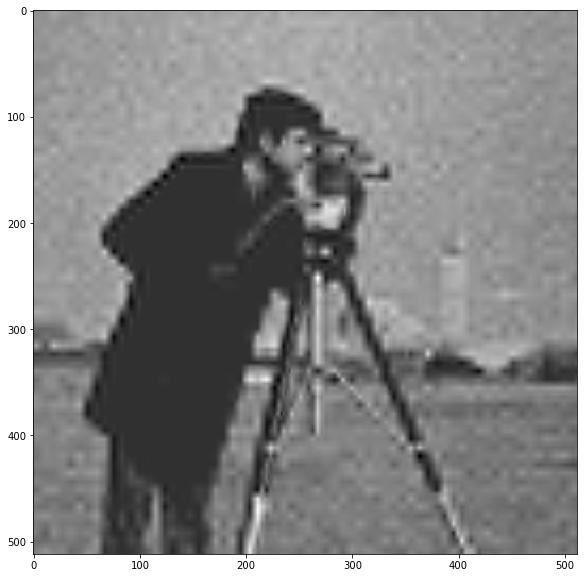

In [129]:
## Let's automate this
coeffs = wavedecn(cam_noisy, wavelet='db3', level=3)
arr, coeff_slices = coeffs_to_array(coeffs)

sigma_est = MAD(coeffs[-1]['dd'])/0.6745
thres = sigma_est*sqrt(2*log(cam_noisy.size))

arr1 = reshape(arr,arr.shape[0]*arr.shape[1])

for k in range(arr1.size):
    if abs(arr1[k]) < thres:
        arr1[k] = 0
    elif arr1[k] >= thres:
        arr1[k] = arr1[k] - thres
    elif arr1[k] <= -thres:
        arr1[k] = arr1[k] + thres
        
arr  = reshape(arr1,arr.shape)
coeffs_from_arr = array_to_coeffs(arr, coeff_slices)

cam_fixed = waverecn(coeffs_from_arr, wavelet='db3')

figure(figsize=(10, 10))
imshow(cam_fixed,cmap='gray')

In [130]:
sigma_est

50.050382005332835

In [131]:
thres

250.01805797246467

## Entropy

Can we quickly compute entropy for a list of values? Seems to be lots of code available online. 

[Try here:](https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python)


In [132]:
def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))

    return - probs.dot(np.log2(probs))

In [133]:
entropy([1,2,3,4])

2.0

In [134]:
entropy([1,1,1,1])

-0.0

In [135]:
entropy([1,1,2,2])

1.0

In [141]:
# This call is way too slow. I had to interrupt it.

# entropy(list(reshape(cam,512*512)))

KeyboardInterrupt: 